In [1]:
# Import the required packages

import pandas as pd
import numpy as np
import pickle
import sklearn

# Import packages for EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Import the different models to test out

from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Import the evaluation metric packages

from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import  log_loss, balanced_accuracy_score

# Import the warnings package and configure it to stop warnings from appearing

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data and copy it to a temporary dataframe for training and testing and one for eda

diabetes_df = pd.read_csv('diabetes_012.csv')
df_temp = diabetes_df.copy()
df_temp_eda = diabetes_df.copy()

The dataset contains 22 features. The features and their meaning are explained below:

1. `Diabetes_012`: The target column. 0 = no diabetes, 1 = prediabetes, and 2 = diabetes
2. `HighBP`: Whether the person has high blood pressure or not. 0 = no high BP, 1 = high BP
3. `HighChol`: Whether the person has high cholesterol or not. 0 = no high cholesterol, 1 = high cholesterol
4. `CholChecl`: Whether the person has taken a cholesterol check in 5 years or not. 0 = no cholesterol check in 5 years, 1 = cholesterol check in 5 years was done
5. `BMI`: Body Mass Index of a person. It is given by the formula: Weight in kgs/(Height in metres)^2
6. `Smoker`: Has the person smoked at least 100 cigarettes in their entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes
7. `Stroke`: Has the person ever been told that they had a stroke? 0 = no, 1 = yes
8. `HeartDiseaseorAttack`: Has/Is the person suffered/ing from Coronary Heart Disease (CHD) or Myocardial Infarction (MI)? 0 = no, 1 = yes
9. `PhysActivity`: Has the person performed physical activity in past 30 days - not including their job? 0 = no, 1 = yes
10. `Fruits`: Does the person consumes fruits 1 or more times per day? 0 = no, 1 = yes
11. `Veggies`: Does the person consumes vegetables 1 or more times per day? 0 = no, 1 = yes
12. `HvyAlcoholConsump`: Is the person a heavy drinker(adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)? 0 = no, 1 = yes
13. `AnyHealthcare`: Does the person have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.? 0 = no, 1 = yes
14. `NoDocbcCost`: Was there a time in the past 12 months when the person needed to see a doctor but could not because of cost? 0 = no, 1 = yes
15. `GenHlth`: Where would the person say that in general their health is in the scale of 1-5? 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
16. `PhysHlth`: In regards to physical health, which includes physical illness and injuries, for how many days during the past 30 days was their physical health not good on a scale of 1-30 days? 
17. `DiffWalk`: Does the person have serious difficulty walking or climbing stairs? 0 = no, 1 = yes
18. `Sex`: Sex of the person. 0 = female, 1 = male
19. `Age`: 13-level age category(see `Distribution of type of diabetic patients by age` legend)
20. `Education`: The highest grade or year of school completed by the person on a scale of 1-6:
    - 1 = Never attended school or only kindergarten 
    - 2 = Grades 1 through 8 (Elementary) 
    - 3 = Grades 9 through 11 (Some high school) 
    - 4 = Grade 12 or GED (High school graduate) 
    - 5 = College 1 year to 3 years (Some college or technical school) 
    - 6 = College 4 years or more (College graduate)
21. `Income`: The annual household income from all sources of the person on a scale of 1-8:
    - 1 = Less than $10,000
    - 2 = Less than $15,000 ($10,000 to less than $15,000)
    - 3 = Less than $20,000 ($15,000 to less than $20,000) 
    - 4 = Less than $25,000 ($20,000 to less than $25,000)
    - 5 = Less than $35,000 ($25,000 to less than $35,000) 
    - 6 = Less than $50,000 ($35,000 to less than $50,000)
    - 7 = Less than $75,000 ($50,000 to less than $75,000)
    - 8 = $75,000 or more

In [3]:
# Check the target distribution of the data

no_diabetes = 0
prediabetes = 0
diabetes = 0

for i in df_temp_eda["Diabetes_012"]:
    if i == 0:
        no_diabetes += 1
    elif i == 1:
        prediabetes += 1
    else:
        diabetes += 1

print("Number of non diabetic records: ", no_diabetes)
print("Number of prediabetic records: ", prediabetes)
print("Number of diabetic records: ", diabetes)

Number of non diabetic records:  213703
Number of prediabetic records:  4631
Number of diabetic records:  35346


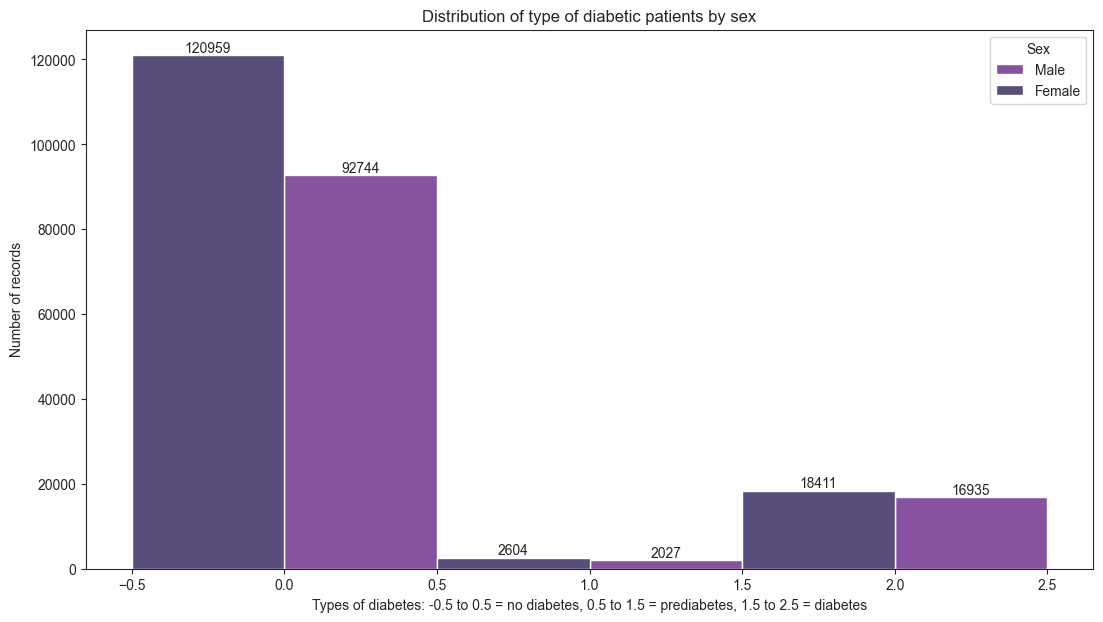

In [4]:
# Plot a histogram to see the distribution of type of diabetic patients by sex

sns.set_style('ticks')
sns.set_palette('magma')

plt.figure(figsize=(13, 7))

hist1 = sns.histplot(data = df_temp_eda, 
                    x = 'Diabetes_012', 
                    hue = 'Sex', 
                    stat = 'count', 
                    discrete = True,
                    multiple = 'dodge')

hist1.set(xlabel = 'Types of diabetes: -0.5 to 0.5 = no diabetes, 0.5 to 1.5 = prediabetes, 1.5 to 2.5 = diabetes',
          ylabel = 'Number of records', 
          title = 'Distribution of type of diabetic patients by sex')

plt.legend(title = 'Sex', loc = 'upper right', labels = ['Male', 'Female'])
hist1.bar_label(hist1.containers[0], fontsize = 10)
hist1.bar_label(hist1.containers[1], fontsize = 10)
plt.show()

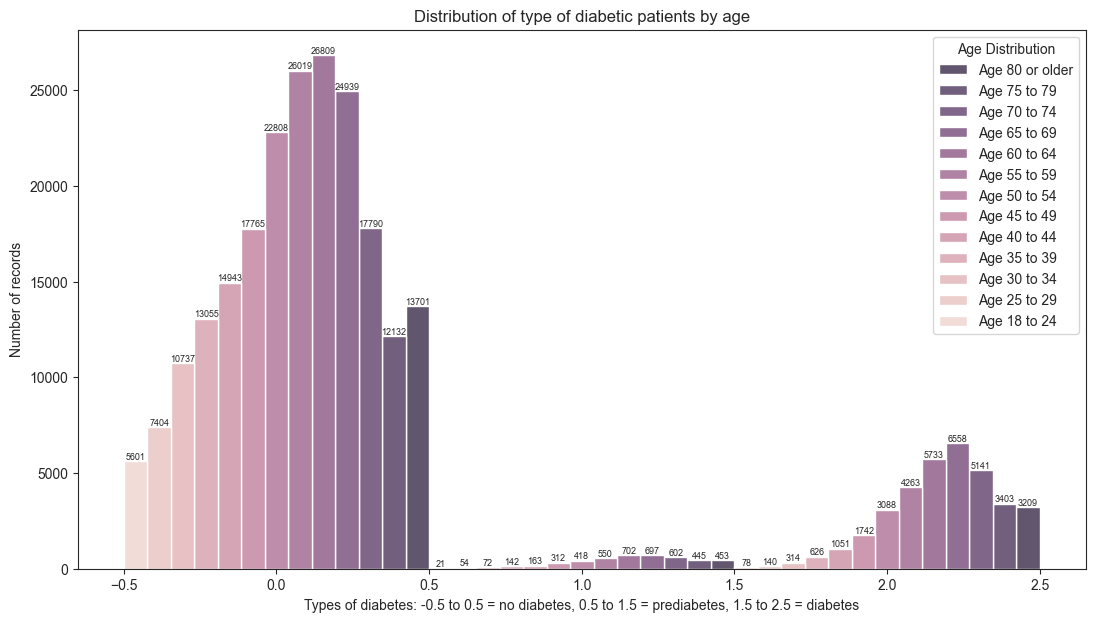

In [5]:
# Plot a histogram to see the distribution of types of diabetic patients by age

sns.set_style('ticks')
sns.set_palette('magma')

plt.figure(figsize=(13, 7))

hist2 = sns.histplot(data = df_temp_eda,
                     x = 'Diabetes_012', 
                     hue = 'Age', 
                     stat = 'count', 
                     discrete = True,
                     multiple = 'dodge')

hist2.set(xlabel = 'Types of diabetes: -0.5 to 0.5 = no diabetes, 0.5 to 1.5 = prediabetes, 1.5 to 2.5 = diabetes',
          ylabel = 'Number of records', 
          title = 'Distribution of type of diabetic patients by age')

hist2.bar_label(hist2.containers[0], fontsize = 6.5)
hist2.bar_label(hist2.containers[1], fontsize = 6.5)
hist2.bar_label(hist2.containers[2], fontsize = 6.5)
hist2.bar_label(hist2.containers[3], fontsize = 6.5)
hist2.bar_label(hist2.containers[4], fontsize = 6.5)
hist2.bar_label(hist2.containers[5], fontsize = 6.5)
hist2.bar_label(hist2.containers[6], fontsize = 6.5)
hist2.bar_label(hist2.containers[7], fontsize = 6.5)
hist2.bar_label(hist2.containers[8], fontsize = 6.5)
hist2.bar_label(hist2.containers[9], fontsize = 6.5)
hist2.bar_label(hist2.containers[10], fontsize = 6.5)
hist2.bar_label(hist2.containers[11], fontsize = 6.5)
hist2.bar_label(hist2.containers[12], fontsize = 6.5)

plt.legend(title = 'Age Distribution',
           loc = 'upper right',
           labels = ['Age 80 or older',
                     'Age 75 to 79',
                     'Age 70 to 74',
                     'Age 65 to 69',
                     'Age 60 to 64',
                     'Age 55 to 59',
                     'Age 50 to 54',
                     'Age 45 to 49',
                     'Age 40 to 44',
                     'Age 35 to 39',
                     'Age 30 to 34',
                     'Age 25 to 29',
                     'Age 18 to 24'])
plt.show()

In [6]:
# Divide the single dataframe into 2; the training, and testing dataset containing the actual data and the target value

x = df_temp.drop('Diabetes_012', axis = 1)
y = df_temp['Diabetes_012']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [7]:
# Create function to fit and score models

def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [8]:
# Test different models and evaluate their scores
# Put models in a dictionary
# The `n_jobs = -1` hyperparameter ensures that all the processes will be used for training

models = {'KNN': KNeighborsClassifier(n_jobs = -1),
          'LogisticRegression': LogisticRegression(multi_class = 'ovr', n_jobs = -1),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'LinearSVC': LinearSVC(multi_class = 'ovr'),
          'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
          'BernoulliNB': BernoulliNB(),
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'XGBClassifier': XGBClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'RandomForestClassifier': RandomForestClassifier(n_jobs = -1),
          'SGDClassifier': SGDClassifier(n_jobs = -1),
          'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
          'PassiveAggressiveClassifier': PassiveAggressiveClassifier(n_jobs = -1),
          'Perceptron': Perceptron(n_jobs = -1),
          'MLPClassifier': MLPClassifier(),
          'NearestCentroid': NearestCentroid(),
          'SVC': SVC()}

In [9]:
%%time
fit_and_score(models, x_train, x_test, y_train, y_test)

CPU times: total: 15min 45s
Wall time: 47min 50s


{'KNN': 0.8333530432040366,
 'LogisticRegression': 0.8459476505834121,
 'DecisionTreeClassifier': 0.7673446862188584,
 'LinearSVC': 0.8456125827814569,
 'HistGradientBoostingClassifier': 0.8514861242510249,
 'BernoulliNB': 0.8170726900031536,
 'AdaBoostClassifier': 0.8494165878271839,
 'XGBClassifier': 0.8504415011037527,
 'RandomForestClassifier': 0.8420845159255755,
 'SGDClassifier': 0.8453563544623147,
 'QuadraticDiscriminantAnalysis': 0.7511628823714916,
 'PassiveAggressiveClassifier': 0.8173289183222958,
 'Perceptron': 0.8056803847366761,
 'MLPClassifier': 0.8503429517502366,
 'NearestCentroid': 0.6991091138442131,
 'SVC': 0.8447847682119205}

In [14]:
# Make a function to evaluate the models

def eval_model(y_true, y_preds, y_pred_probs):
    acc = accuracy_score(y_true, y_preds)
    bal_acc = balanced_accuracy_score(y_true, y_preds)
    pres = precision_score(y_true, y_preds, average = 'weighted')
    rec = recall_score(y_true, y_preds, average = 'weighted')
    f1 = f1_score(y_true, y_preds, average = 'weighted')
    ll = log_loss(y_true, y_pred_probs)

    eval = {}
    eval['Accuracy'] = acc
    eval['Balanced Accuracy'] = bal_acc
    eval['Precision'] = pres
    eval['Recall'] = rec
    eval['F1 score'] = f1
    eval['Log Loss'] = ll

    return eval

In [ ]:
%%time
# This is the 5th iteration of the HistGradientBoostingClassifier model, the other 4 are not shown for ease of readability

cv = ShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
              'max_iter': [25, 50, 75],
              'max_depth': [None, 2, 3, 4],
              'l2_regularization': [3.0, 3.5, 4.0, 4.5, 5.0],
              'max_features': [0.05, 0.1, 0.15],
              'scoring': ['f1_weighted']}

hist5 = HistGradientBoostingClassifier(early_stopping = True, n_iter_no_change = 5, class_weight = 'balanced', random_state = 42)

grid_search_hist = GridSearchCV(hist, param_grid, cv = cv, verbose = 3)
grid_search_hist.fit(x_train, y_train)

In [ ]:
# Save and load the 5th iteration of the HistGradientBoostingClassifier model

pickle.dump(grid_search_hist, open('hist5', 'wb'))


In [10]:
hist5 = pickle.load(open('hist5', 'rb'))

In [11]:
hist5.best_params_

{'l2_regularization': 5.0,
 'learning_rate': 0.01,
 'max_depth': 2,
 'max_features': 0.05,
 'max_iter': 25,
 'scoring': 'f1_weighted'}

In [12]:
# Evaluate the `hist5` model

y_preds_test = hist5.predict(x_test)
y_preds_probs_test = hist5.predict_proba(x_test)
y_preds_train = hist5.predict(x_train)
y_preds_probs_train = hist5.predict_proba(x_train)

In [15]:
hist5_train_scores = eval_model(y_train, y_preds_train, y_preds_probs_train)
hist5_test_scores = eval_model(y_test, y_preds_test, y_preds_probs_test)

hist5_train_scores, hist5_test_scores

({'Accuracy': 0.6806458924629455,
  'Balanced Accuracy': 0.4967367702081272,
  'Precision': 0.8331930286272179,
  'Recall': 0.6806458924629455,
  'F1 score': 0.7348126406040421,
  'Log Loss': 1.0821369643577665},
 {'Accuracy': 0.6800890886155787,
  'Balanced Accuracy': 0.49389662819882046,
  'Precision': 0.8356643490071257,
  'Recall': 0.6800890886155787,
  'F1 score': 0.7348708693684901,
  'Log Loss': 1.0822027288491434})